Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


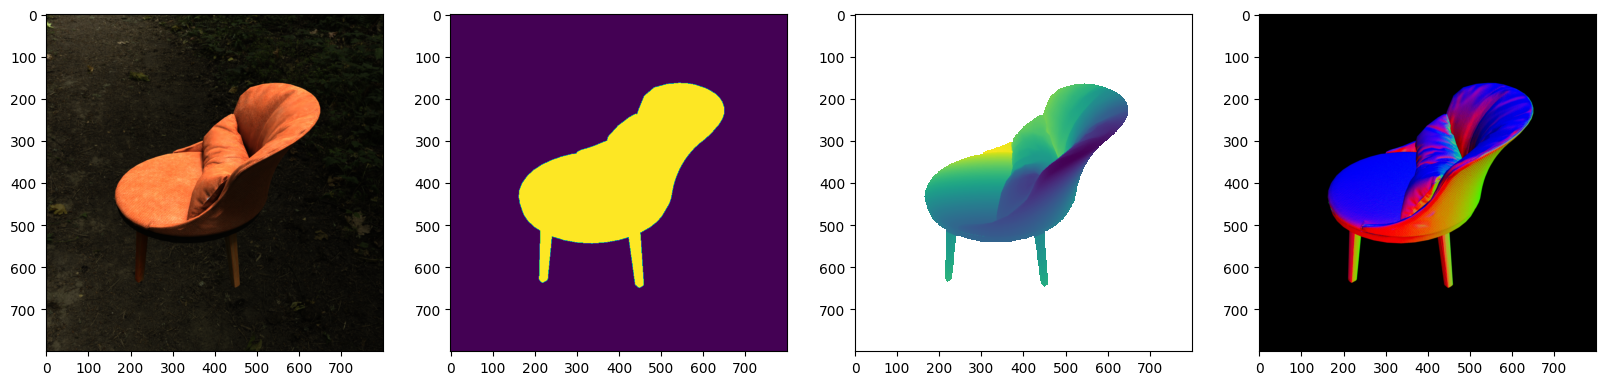

In [7]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
import pyexr

image_path = '/workspace/data/NeRD/synthetic/Chair/results_train_200/r_0.exr'

exr_file = pyexr.open(image_path)
img = exr_file.get("Image")[..., 0:3] # [H, W, C]
mask = exr_file.get("Mask") # [H, W, 1]
depth = exr_file.get("Depth") # [H, W, 1]
normal = exr_file.get("Normal") # [H, W, 3]

# plot all channels
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 4, 1)
plt.imshow(img)
fig.add_subplot(1, 4, 2)
plt.imshow(mask)
fig.add_subplot(1, 4, 3)
plt.imshow(depth)
fig.add_subplot(1, 4, 4)
plt.imshow(normal)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


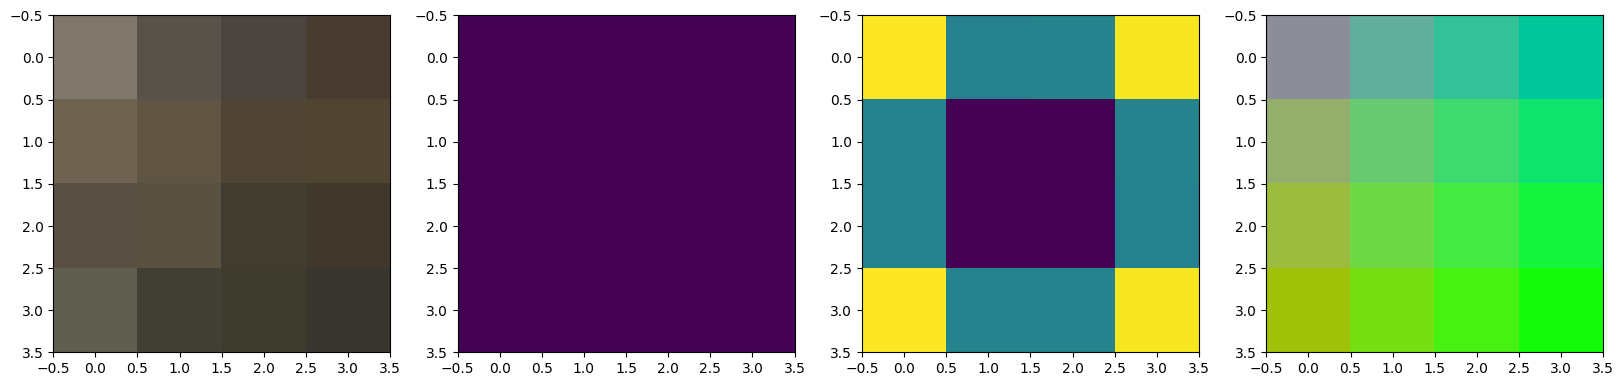

In [18]:
image_path = '/workspace/data/NeRD/synthetic/Chair/wb_train_200/r_19.exr'

exr_file = pyexr.open(image_path)
img = exr_file.get("Image")[..., 0:3] # [H, W, C]
mask = exr_file.get("Mask") # [H, W, 1]
depth = exr_file.get("Depth") # [H, W, 1]
normal = exr_file.get("Normal") # [H, W, 3]

# plot all channels
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 4, 1)
plt.imshow(img)
fig.add_subplot(1, 4, 2)
plt.imshow(mask)
fig.add_subplot(1, 4, 3)
plt.imshow(depth)
fig.add_subplot(1, 4, 4)
plt.imshow(normal)
plt.show()

In [11]:
from reni.illumination_fields.reni_illumination_field import RENIFieldConfig
import torch
from pathlib import Path

ckpt_path = Path('/users/jadg502/scratch/code/nerfstudio/outputs/reni/reni/2023-08-23_075123/nerfstudio_models/step-000050000.ckpt')

if not ckpt_path.exists():
    raise ValueError(f"Could not find illumination field checkpoint at {ckpt_path}")

ckpt = torch.load(str(ckpt_path))
illumination_field_dict = {}
match_str = "_model.field."
ignore_strs = ["_model.field.train_logvar", "_model.field.eval_logvar", "_model.field.train_mu", "_model.field.eval_mu"]
for key in ckpt["pipeline"].keys():
    if key.startswith(match_str) and not any([ignore_str in key for ignore_str in ignore_strs]):
        illumination_field_dict[key[len(match_str) :]] = ckpt["pipeline"][key]


In [12]:
illumination_field_dict.keys()

dict_keys(['_model.field.min_max', '_model.field.log_domain', '_model.field.vn_proj_in.1.weight', '_model.field.vn_invar.mlp.0.weight', '_model.field.vn_invar.mlp.1.W', '_model.field.vn_invar.mlp.1.U', '_model.field.network.residual_projection.weight', '_model.field.network.residual_projection.bias', '_model.field.network.layers.0.mha.query.weight', '_model.field.network.layers.0.mha.query.bias', '_model.field.network.layers.0.mha.key.weight', '_model.field.network.layers.0.mha.key.bias', '_model.field.network.layers.0.mha.value.weight', '_model.field.network.layers.0.mha.value.bias', '_model.field.network.layers.0.mha.fc_out.weight', '_model.field.network.layers.0.mha.fc_out.bias', '_model.field.network.layers.0.norm1.weight', '_model.field.network.layers.0.norm1.bias', '_model.field.network.layers.0.norm2.weight', '_model.field.network.layers.0.norm2.bias', '_model.field.network.layers.0.fc.0.weight', '_model.field.network.layers.0.fc.0.bias', '_model.field.network.layers.0.fc.2.weig

In [8]:
ckpt['pipeline']['_model.field.vn_invar.mlp.1.U']
ckpt['pipeline']['_model.field.vn_proj_in.1.weight']
ckpt['pipeline']['_model.field.train_logvar']
ckpt['pipeline']['_model.field.train_mu']
ckpt['pipeline']['_model.field.train_eval_logvar']
ckpt['pipeline']['_model.field.train_eval_mu']

tensor(False, device='cuda:0')